In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm as tqdm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import time 
import math
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor


In [2]:
data = pd.read_csv('./datasets/data.csv')
data_1 = pd.read_csv('./datasets/data_2000_2020.csv')
data_2 = pd.read_csv('./datasets/data_1920_1940.csv')


In [3]:
features = ["acousticness","danceability","energy","speechiness","liveness","valence","tempo","instrumentalness",
            "key","mode"]

In [3]:
df = data_1.select_dtypes(np.number)
df.head()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
0,0.285,2000,0.00239,0.429,266773,0.661,0,0.000121,11,0.2340,-7.227,1,84,0.0281,173.372
1,0.613,2000,0.14300,0.843,270507,0.806,1,0.000000,4,0.0771,-5.946,0,80,0.2690,94.948
2,0.400,2000,0.00958,0.556,216880,0.864,0,0.000000,3,0.2090,-5.870,0,84,0.0584,105.143
3,0.543,2000,0.00664,0.545,233933,0.865,0,0.000011,11,0.1680,-5.708,0,78,0.0286,99.009
4,0.760,2000,0.03020,0.949,284200,0.661,1,0.000000,5,0.0454,-4.244,0,80,0.0572,104.504


In [4]:
def inputPopularity(cols):
    if cols>=5 and cols< 15:
        return 1
    elif cols>=15 and cols<25:
        return 2
    elif cols>=29 and cols<35:
        return 3
    elif cols>=39 and cols<45:
        return 4
    elif cols>=49 and cols<55:
        return 5
    elif cols>=59 and cols<65:
        return 6
    elif cols>=69 and cols<75:
        return 7
    elif cols>=79 and cols<85:
        return 8
    elif cols>=89 and cols<95:
        return 9
    else:
        return 0
df['popularityCategory'] = df['popularity'].apply(inputPopularity)

<ipython-input-4-8054637bbd34>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['popularityCategory'] = df['popularity'].apply(inputPopularity)


In [5]:
df.head()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,popularityCategory
0,0.285,2000,0.00239,0.429,266773,0.661,0,0.000121,11,0.2340,-7.227,1,84,0.0281,173.372,8
1,0.613,2000,0.14300,0.843,270507,0.806,1,0.000000,4,0.0771,-5.946,0,80,0.2690,94.948,8
2,0.400,2000,0.00958,0.556,216880,0.864,0,0.000000,3,0.2090,-5.870,0,84,0.0584,105.143,8
3,0.543,2000,0.00664,0.545,233933,0.865,0,0.000011,11,0.1680,-5.708,0,78,0.0286,99.009,0
4,0.760,2000,0.03020,0.949,284200,0.661,1,0.000000,5,0.0454,-4.244,0,80,0.0572,104.504,8


In [6]:
df_new = pd.DataFrame(data_1)

In [7]:
df_new['popularity'] = df['popularityCategory']
df_new.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.285,2000,0.00239,['Coldplay'],0.429,266773,0.661,0,3AJwUDP919kvQ9QcozQPxg,0.000121,11,0.2340,-7.227,1,Yellow,8,2000-07-10,0.0281,173.372
1,0.613,2000,0.14300,['OutKast'],0.843,270507,0.806,1,0I3q5fE6wg7LIfHGngUTnV,0.000000,4,0.0771,-5.946,0,Ms. Jackson,8,2000-10-31,0.2690,94.948
2,0.400,2000,0.00958,['Linkin Park'],0.556,216880,0.864,0,60a0Rd6pjrkxjPbaKzXjfq,0.000000,3,0.2090,-5.870,0,In the End,8,2000-10-24,0.0584,105.143
3,0.543,2000,0.00664,['3 Doors Down'],0.545,233933,0.865,0,6ZOBP3NvffbU4SZcrnt1k6,0.000011,11,0.1680,-5.708,0,Kryptonite,0,2000,0.0286,99.009
4,0.760,2000,0.03020,['Eminem'],0.949,284200,0.661,1,3yfqSUWxFvZELEM4PmlwIR,0.000000,5,0.0454,-4.244,0,The Real Slim Shady,8,2000-05-23,0.0572,104.504


In [8]:
df_cat = data_1.select_dtypes('object')
df_cat.head()

,artists,id,name,release_date
0,['Coldplay'],3AJwUDP919kvQ9QcozQPxg,Yellow,2000-07-10
1,['OutKast'],0I3q5fE6wg7LIfHGngUTnV,Ms. Jackson,2000-10-31
2,['Linkin Park'],60a0Rd6pjrkxjPbaKzXjfq,In the End,2000-10-24
3,['3 Doors Down'],6ZOBP3NvffbU4SZcrnt1k6,Kryptonite,2000
4,['Eminem'],3yfqSUWxFvZELEM4PmlwIR,The Real Slim Shady,2000-05-23


In [10]:
print(data_1.shape, df.shape, df_cat.shape)

(41450, 19) (41450, 16) (41450, 4)


In [11]:
data_grp = data_1.groupby('artists').mean()

In [93]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
rfr.score(X_test, y_test)

0.8097701978921703

In [ ]:
%%time
rfr_model = RandomForestRegressor( )
para_rfr ={'n_estimators': [100,200,400,800,1200],
            'min_samples_split': [10,8,12],
            'max_depth': [10,20,50,100,120],
            'max_features':[5,50,150,300]
         }
gs_rfr_log = GridSearchCV(rfr_model, para_rfr, n_jobs=-1)
gs_rfr_log.fit(X_train, y_train)
print(gs_rfr_log.best_params_)
print(gs_rfr_log.best_score_)

In [ ]:
data_grp.head()

In [12]:
def prepros(df_new):
    df_new = df_new.select_dtypes(np.number)
    features= [col for col in df_new.columns if col not in ['popularity']]
    X = df_new[features]
    y = df_new['popularity']
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.1)
    ss = StandardScaler()
    X_train = ss.fit_transform(X_train)
    X_test = ss.transform(X_test)
    
    return X_train, X_test, y_train, y_test, features

In [13]:
X_train, X_test, y_train, y_test, features = prepros(data)

In [11]:
data = data[(data.year > 1950) & (data.year < 2020)]

In [73]:
data[['year']].groupby('year').agg({'year':'count'})

,year
year,
1951,2000
1952,2000
1953,1950
1954,2000
1955,2000
...,...
2015,1974
2016,1797
2017,1992


/Users/admin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='popularity'>

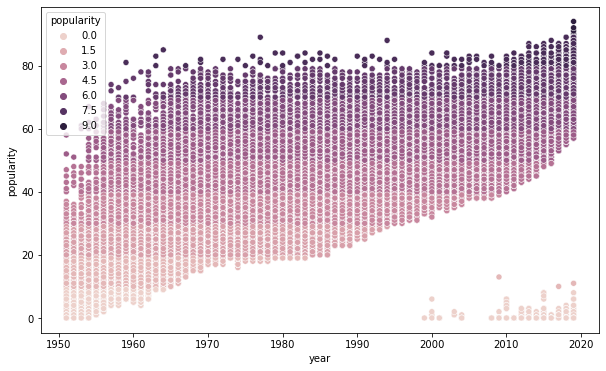

In [83]:
plt.figure(figsize = (10,6))
sns.scatterplot(data.year, data.popularity, hue=np.floor(data.popularity/10))

In [87]:
log_model = LogisticRegression(C= 1, solver= 'saga', tol= 0.1)
log_model.fit(X_train, y_train)

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [88]:
log_pred = log_model.predict(X_test)


In [89]:
log_model.score(X_test, y_test)


0.18252666119770303

In [43]:
display(metrics.accuracy_score(y_test, log_pred))

0.34499396863691195

In [23]:
confusion_matrix(y_test, log_pred)

array([[  71,    0,    0,    0,   69,  134,   22,    0,    0,    0],
       [   0,    0,    0,    0,    1,    1,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    3,    4,    0,    0,    0],
       [   1,    0,    0,    0,  176,  310,   58,    0,    0,    0],
       [  12,    0,    0,    0, 1199, 2339,  333,    0,    0,    0],
       [  19,    0,    0,    0, 1057, 2848,  478,    0,    0,    0],
       [  11,    0,    0,    0,  621, 1917,  596,    0,    0,    0],
       [   2,    0,    0,    0,  146,  752,  275,    0,    0,    0],
       [   0,    0,    0,    0,   16,  138,   49,    0,    0,    0],
       [   0,    0,    0,    0,    1,   13,    7,    0,    0,    0]])

In [91]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)



0.7581043889542903

In [15]:
from sklearn.ensemble import RandomForestRegressor

In [21]:
def pca_fn(X_train, X_test, n_components):
    pca = PCA(n_components = n_components)
    pc1 = pca.fit_transform(X_train)
    pc2 = pca.transform(X_test)
    return pc1, pc2

In [22]:
X_train, X_test = pca_fn(X_train, X_test, 2)

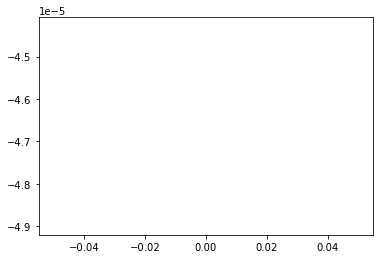

In [23]:
scores = []

for i in range(1, X_train.shape[1]):
    X_train_pc, X_test_pc = pca_fn(X_train, X_test, i)
    lr = LinearRegression()
    lr.fit(X_train_pc, y_train)
    lr_pred = lr.predict(X_test_pc)
    
    scores.append(lr.score(X_test_pc, y_test))

plt.plot(scores)


In [24]:
scores

[-4.663939789661953e-05]

In [21]:
y[y>20].hist(bins= 50)

NameError: name 'y' is not defined

In [22]:
len(X_train), len(X_test), len(y_train), len(y_test)

(27771, 13679, 27771, 13679)

In [23]:
lr.score(X_test, y_test)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 2)

In [22]:
lr.score(X_train, y_train)

0.0791194537796871

In [20]:
log_model = LogisticRegression()
para_log ={'tol': [0.001, 0.01, 0.1], 'C': [10,5,1,0.1],
          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
gs_log = GridSearchCV(log_model, para_log, n_jobs=-1)
gs_log.fit(X_train, y_train)
print(gs_log.best_params_)

{'C': 10, 'solver': 'liblinear', 'tol': 0.001}


In [21]:
gs_log.best_score_

0.40587052673904306

In [24]:
dt_model = DecisionTreeClassifier(min_samples_leaf=100, random_state=10)
dt_model.fit(X_train, y_train)
y_dt_pred = dt_model.predict(X_test)
#score = dt_model.score(X_test, y_test)*100
display(metrics.accuracy_score(y_test, y_dt_pred))

0.333869434900212

In [90]:
rf_model = RandomForestClassifier(n_estimators=100, criterion='entropy',
                                 min_samples_split=6, min_samples_leaf=10,
                                 n_jobs=-1)
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)
display(metrics.accuracy_score(y_test, y_rf_pred))

0.19647251845775227

In [27]:
rf_model = RandomForestClassifier( )
para_rf ={'n_estimators': [100,200,400,800,1200],
            'min_samples_split': [10,8,12],
            'max_depth': [10,20,50,100,120],
            'max_features':[5,50,150,300]
         }
gs_rf_log = GridSearchCV(rf_model, para_rf, n_jobs=-1)
gs_rf_log.fit(X_train, y_train)
print(gs_rf_log.best_params_)
print(gs_rf_log.best_score_)

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.40533441 0.40579011 0.40546844 0.40552205 0.4057633  0.40589733
 0.40605817 0.40570969 0.40579011 0.40589733 0.40541482 0.40592414
 0.40589733 0.40562927 0.40579011        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.39648841 0.39686369 0.39922262 0.39860608 0.39906179 0.39453156
 0.39624715 0.39745342 0.39723898 0.39748023 0.39707814 0.39798955
 0.39991958 0.39994639 0.39973194        

{'max_depth': 10, 'max_features': 5, 'min_samples_split': 8, 'n_estimators': 200}
0.40605816914622705


In [35]:
y_train[:30]

22691    5
7273     0
28649    6
34540    4
19272    0
16246    0
1089     7
13354    0
29218    0
10596    0
38473    4
18290    0
27565    5
24831    0
34793    4
22191    6
181      0
18309    6
22185    5
29193    1
6601     6
39447    5
41409    6
22917    5
22678    5
13691    5
26145    5
35159    4
13503    5
9255     0
Name: popularity, dtype: int64

In [38]:
X_train[:20,:]

array([[-0.81500648, -0.97239232,  0.52013329, -0.59369124,  4.8012054 ,
        -0.29826055, -0.70847814, -0.35043271,  0.4897489 ,  0.7154398 ],
       [-0.04788114,  0.20152324, -0.30162083, -0.60613712, -0.61085283,
        -1.30807703,  0.28488576, -0.35043271,  0.4897489 , -1.39774165],
       [ 0.12012704,  0.59091962, -1.09714875, -0.24329185, -0.21390177,
        -0.33404145, -0.98333875, -0.35043271,  0.76976304,  0.7154398 ],
       [-0.26965193, -0.30240149, -0.89171022, -0.67794027, -0.6189922 ,
        -1.32795531, -0.60532812, -0.35002261,  1.60980546, -1.39774165],
       [-0.17892752,  0.65391021,  0.6294091 , -0.65209113, -0.6941249 ,
        -0.29826055, -0.52791681, -0.35041434, -0.9103218 ,  0.7154398 ],
       [-0.32005439,  1.00894809,  0.93538137, -0.27297049, -0.10746379,
         0.10328065, -0.36642359, -0.34817291, -0.35029352, -1.39774165],
       [-0.25285112,  1.12347644,  0.69497459,  0.03147487,  0.67516841,
         1.35958776,  0.7109246 , -0.35043271

In [28]:
gs_rf_log.cv_results_

{'mean_fit_time': array([1.15549570e+01, 2.18164752e+01, 4.18882000e+01, 9.44465862e+01,
        1.54719231e+02, 1.33519655e+01, 2.65861330e+01, 5.16393291e+01,
        9.84295063e+01, 1.47676983e+02, 1.27035275e+01, 2.49745228e+01,
        4.85033263e+01, 1.00358880e+02, 1.49026926e+02, 8.87823105e-02,
        1.51019621e-01, 2.87347984e-01, 5.80897427e-01, 8.38809872e-01,
        8.01739216e-02, 1.50425577e-01, 2.74855185e-01, 6.17761421e-01,
        8.39866400e-01, 8.26212406e-02, 1.54241943e-01, 3.16887045e-01,
        6.23341608e-01, 9.30838966e-01, 8.77439976e-02, 1.55053091e-01,
        2.92209768e-01, 5.90256214e-01, 9.43331242e-01, 8.47887993e-02,
        1.54857016e-01, 2.90000391e-01, 5.73602867e-01, 8.40681219e-01,
        8.53965759e-02, 1.49753094e-01, 2.85451937e-01, 5.68209219e-01,
        9.09528017e-01, 8.07570934e-02, 1.55338860e-01, 2.82224751e-01,
        6.10258007e-01, 8.59600925e-01, 7.88911819e-02, 1.50854397e-01,
        3.27420998e-01, 6.45622540e-01, 8.27090

In [24]:
svc_model = SVC()
para_svc ={'gamma': [0.01, 0.02, 0.09, 0.05, 0.1, 0.15, 0.2]}
gs_svc_log = GridSearchCV(svc_model, para_svc, n_jobs=-1)
gs_svc_log.fit(X_train, y_train)
print(gs_svc_log.best_params_)

{'gamma': 0.05}


In [26]:
print(gs_svc_log.best_score_)

0.4061653933789036


In [37]:
svc = SVC()
svc.fit(X_train, y_train)

y_svc_pred = svc.predict(X_test)

display(metrics.accuracy_score(y_test, y_svc_pred))

#print(confusion_matrix(y_test,y_pred))
#print(classification_report(y_test,y_pred))

0.348782805760655

In [26]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
score_test_knn = accuracy_score(y_test, knn_pred) * 100

print(score_test_knn)

28.956795087360188


In [27]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

rf_score = metrics.accuracy_score(y_test, y_pred_rf)

print(rf_score)

0.34585861539586227
